In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('../input/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.columns.values

array(['url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked',
       'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)'], dtype=object)

In [4]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [7]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [8]:
df.describe(include=["O"])

,url,address,name,online_order,book_table,rate,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/litti-twist-h...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,216,5124,19132,182,2913,7576,7595,39617,25942,3279


In [9]:
data=df

In [20]:
data["with_phone"]=np.where(data["phone"].isna()==True,0,1)

In [22]:
data.with_phone.describe(include=["O"])

count    51717.000000
mean         0.976642
std          0.151039
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: with_phone, dtype: float64

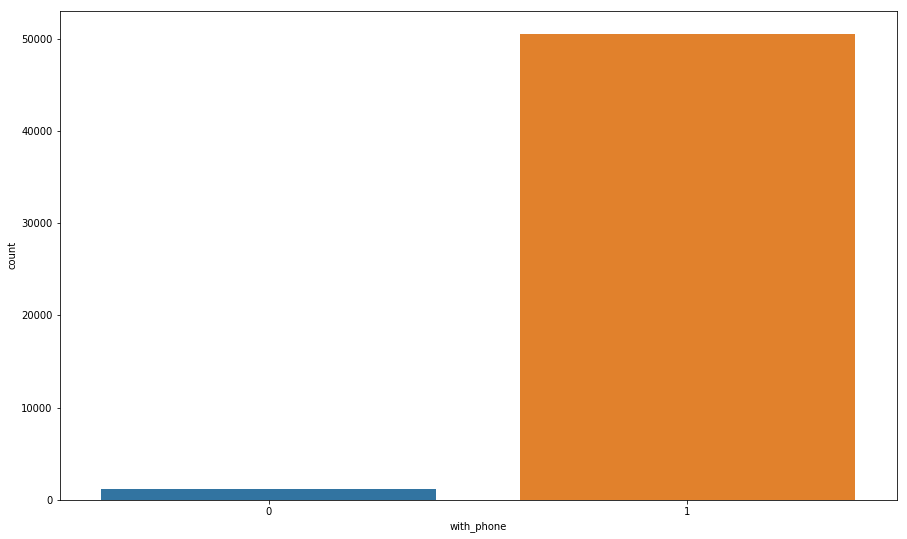

In [23]:
plt.figure(figsize=(15,9))
sns.countplot(data.with_phone)

In [25]:
data=data.drop(["phone","url","address"],axis=1)

In [26]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),with_phone
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,1
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,1
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,1
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,1
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,1


In [27]:
data.rate = data.rate.replace(0, np.nan)
data.dropna(how ='any', inplace = True)

In [28]:
data.rename(columns={'approx_cost(for two people)': 'average_cost', 'listed_in(city)': 'locality','listed_in(type)': 'restaurant_type'}, inplace=True)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality,with_phone
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,1
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,1
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,1
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,1
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,1


In [32]:
data.rate = data.rate.astype(str)
data.rate = data.rate.apply(lambda x: x.replace('/5',''))
#data.rate = data.rate.apply(lambda x: float(x))

Text(0.5, 1.0, 'locality')

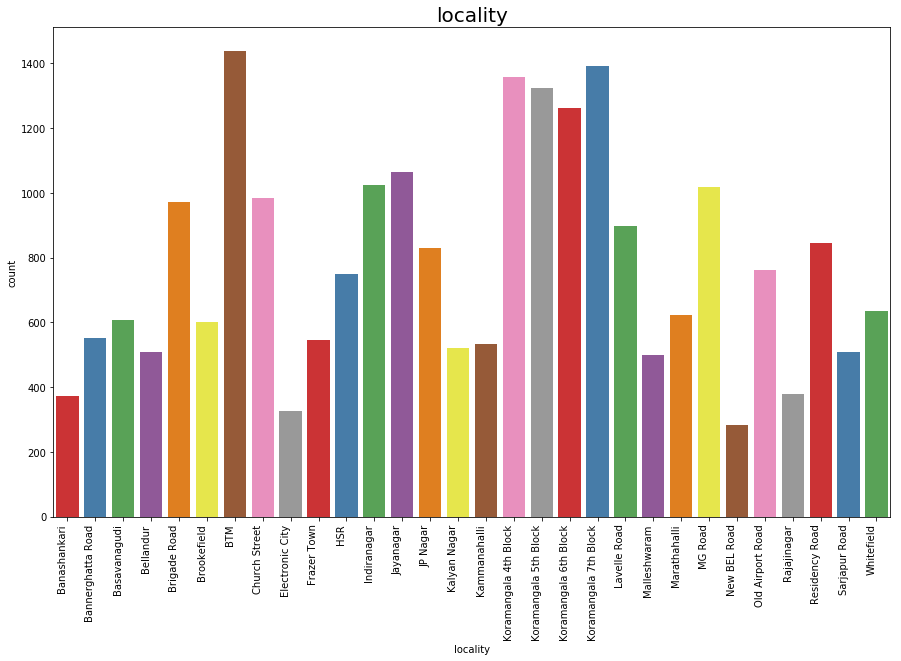

In [34]:

plt.figure(figsize=(15,9))
g = sns.countplot(x="locality",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('locality',size = 20)

In [64]:
data=data.reset_index()

In [65]:
# Basic data visualization

# What kind of foods are served in Bangalore?
splist = []
cuisine = []
for i in range(0, data['cuisines'].count()):
    splist = str(data['cuisines'][i]).split(', ')
    for item in splist:
        if item not in cuisine:
            cuisine.append(item)
cuisine

['North Indian',
 'Mughlai',
 'Chinese',
 'Thai',
 'Cafe',
 'Mexican',
 'Italian',
 'South Indian',
 'Rajasthani',
 'Pizza',
 'Continental',
 'Momos',
 'Beverages',
 'Fast Food',
 'American',
 'French',
 'European',
 'Burger',
 'Biryani',
 'Street Food',
 'Rolls',
 'Ice Cream',
 'Desserts',
 'Andhra',
 'Healthy Food',
 'Salad',
 'Asian',
 'Korean',
 'Indonesian',
 'Japanese',
 'Goan',
 'Seafood',
 'Kebab',
 'Steak',
 'Sandwich',
 'Bakery',
 'Vietnamese',
 'Juices',
 'Arabian',
 'BBQ',
 'Mangalorean',
 'Tea',
 'Afghani',
 'Finger Food',
 'Tibetan',
 'Mithai',
 'Middle Eastern',
 'Mediterranean',
 'Bengali',
 'Charcoal Chicken',
 'Kerala',
 'Oriya',
 'Bihari',
 'Roast Chicken',
 'Bohri',
 'African',
 'Lebanese',
 'Hyderabadi',
 'Belgian',
 'South American',
 'Maharashtrian',
 'Konkan',
 'Chettinad',
 'Wraps',
 'Turkish',
 'Coffee',
 'Afghan',
 'Modern Indian',
 'Iranian',
 'Lucknowi',
 'Gujarati',
 'Tex-Mex',
 'Spanish',
 'Malaysian',
 'Burmese',
 'Sushi',
 'Portuguese',
 'Parsi',
 'Nepa

In [66]:
cuisineCount = pd.DataFrame(columns = ['cuisines', 'count'])
i = 0;
for c in cuisine:
    restaurant = data['cuisines'].str.contains(c, case = False, regex = True, na = False)
    #print( "{} : {}".format(c, restaurant[ restaurant == True].count() )
    cuisineCount.loc[i] = [c, restaurant[ restaurant == True].count()]
    i = i+1

cuisineCount.sort_values(by = 'count', axis = 0, ascending = False, inplace = True)

print("The top 10 cuisines sold in bangalore:\n{}".format(cuisineCount.head(25)))

The top 10 cuisines sold in bangalore:
        cuisines  count
0   North Indian  10116
2        Chinese   7482
10   Continental   4283
4           Cafe   3576
13     Fast Food   3268
7   South Indian   2838
6        Italian   2763
22      Desserts   2689
18       Biryani   2604
12     Beverages   2343
9          Pizza   1594
17        Burger   1455
31       Seafood   1237
14      American   1185
3           Thai   1183
19   Street Food   1161
26         Asian   1051
1        Mughlai    985
25         Salad    942
43   Finger Food    894
35        Bakery    854
23        Andhra    819
11         Momos    810
21     Ice Cream    754
41           Tea    666


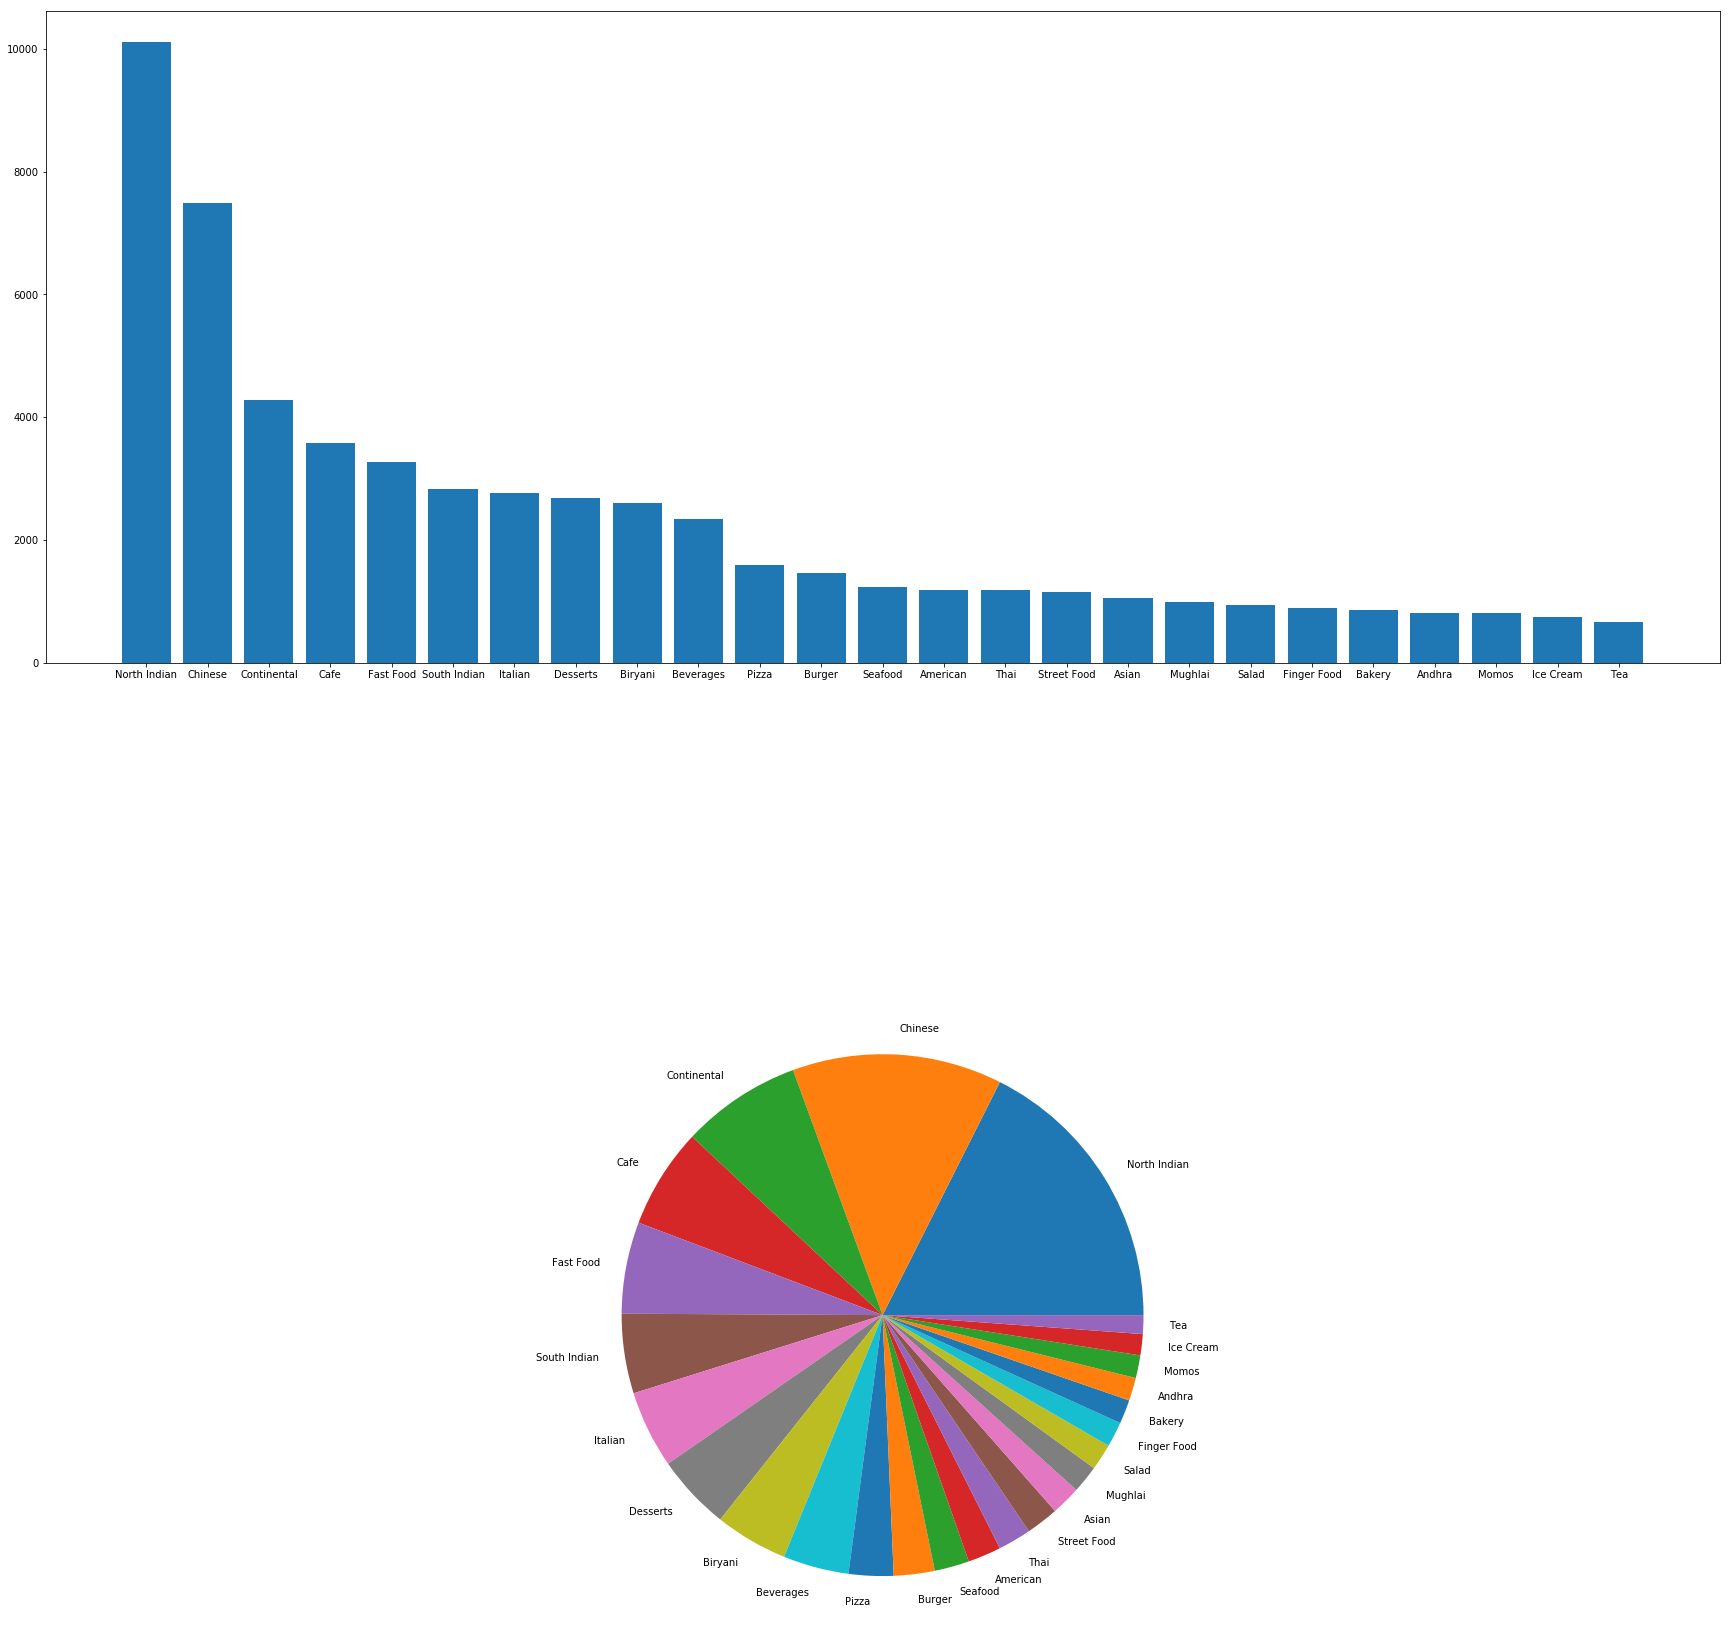

In [68]:
# bar plot on the top 25 cuisines sold in Bangalore

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure (1, figsize = (30,30))

data_CuisineCount = cuisineCount.iloc[0:25, :]

plt.subplot(2,1,1)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.bar(data_CuisineCount['cuisines'], data_CuisineCount['count'])
plt.subplot(2,1,2)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.pie(x = data_CuisineCount['count'], labels = data_CuisineCount['cuisines'])
plt.show()

In [69]:
location_count = data.groupby(['location']).size().reset_index(name="count")
location_count = location_count.sort_values('count',ascending = False)
location_count.head()

,location,count
42,Koramangala 5th Block,1799
0,BTM,1484
26,Indiranagar,1371
22,HSR,1177
30,Jayanagar,1067


In [71]:
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go


location_count
inputdata = [go.Bar(
            x=location_count['location'],
            y=location_count['count']
    )]
py.iplot(inputdata, filename='basic-bar')
plt.show()

In [73]:
# Dishes liked most
dish_group_count = data.groupby(['dish_liked']).size().reset_index(name="count")
dish_group_count = dish_group_count.sort_values('count',ascending = False)
dish_group_top10 = dish_group_count.head(20)
inputdata = [go.Bar(
            x=dish_group_top10['dish_liked'],
            y=dish_group_top10['count']
    )]
py.iplot(inputdata, filename='basic-bar')
plt.show()

In [76]:
print("No. of restaurants with online delivery:{}".format((data.online_order == 'Yes').sum()))


No. of restaurants with online delivery:16448


In [77]:
print("No. of restaurants which does not deliver online:{}".format((data.online_order == 'No').sum()))


No. of restaurants which does not deliver online:6958


Text(0.5, 1.0, 'Restaurants delivering online or Not')

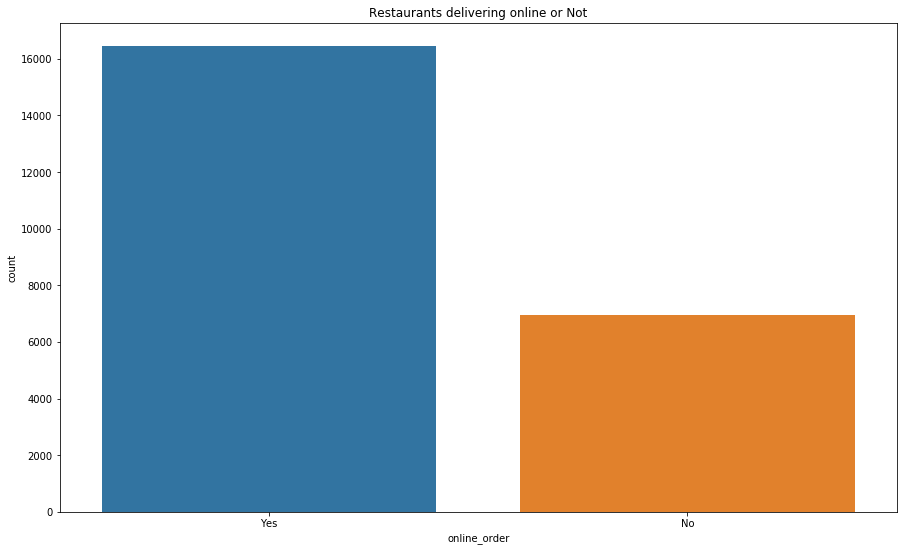

In [79]:
plt.figure(figsize=(15,9))
sns.countplot(x=data['online_order'])
plt.title('Restaurants delivering online or Not')

Text(0.5, 1.0, 'Type of Restaurants delivering online or Not')

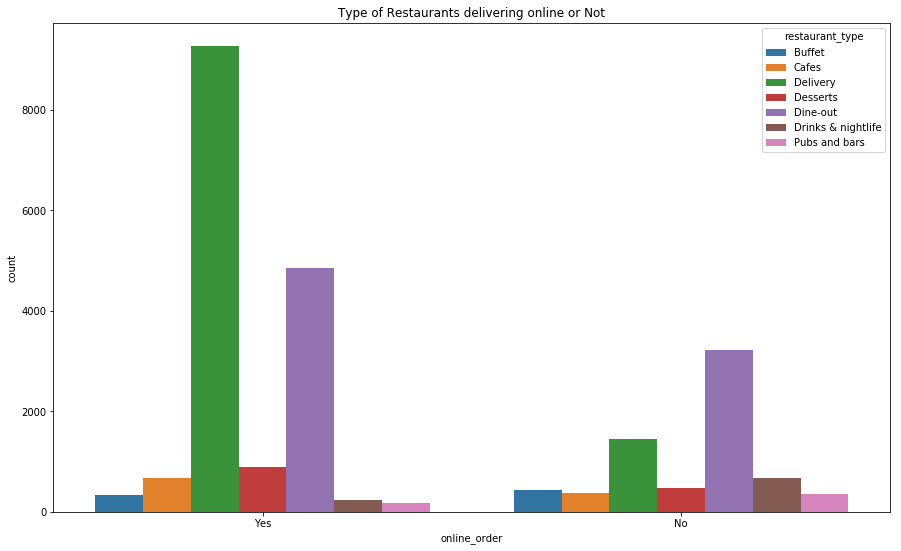

In [81]:
plt.figure(figsize=(15,9))
sns.countplot(x=data['online_order'], hue = data['restaurant_type'])
plt.title('Type of Restaurants delivering online or Not')

Text(0.5, 1.0, 'Restaurants providing Table booking facility:')

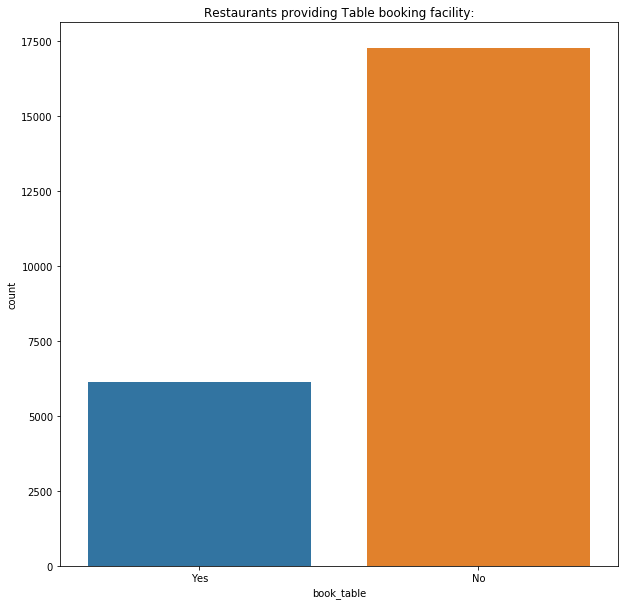

In [82]:
sns.countplot(x=data['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants providing Table booking facility:')

Text(0.5, 1.0, 'Type Of Restaurants providing Table booking facility:')

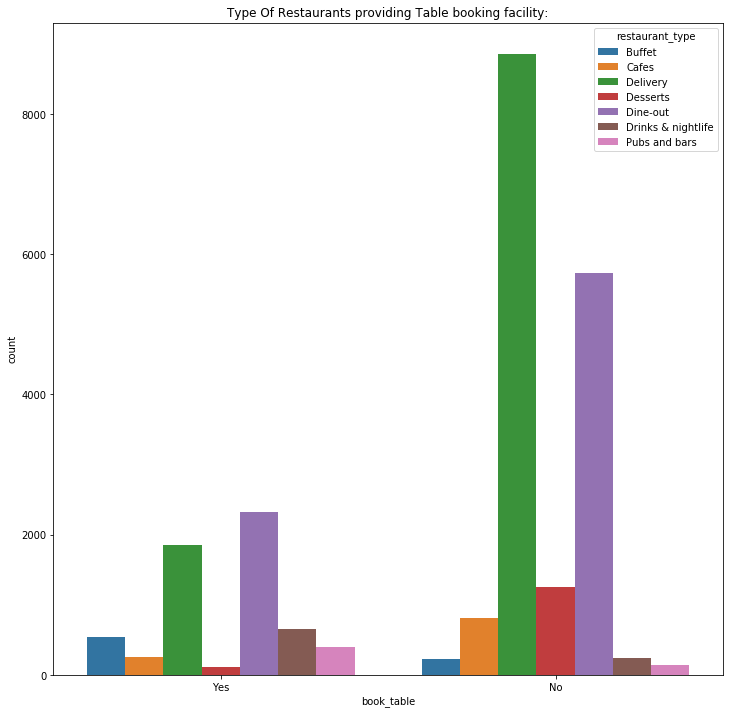

In [83]:
sns.countplot(x=data['book_table'],hue = data['restaurant_type'])
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Type Of Restaurants providing Table booking facility:')

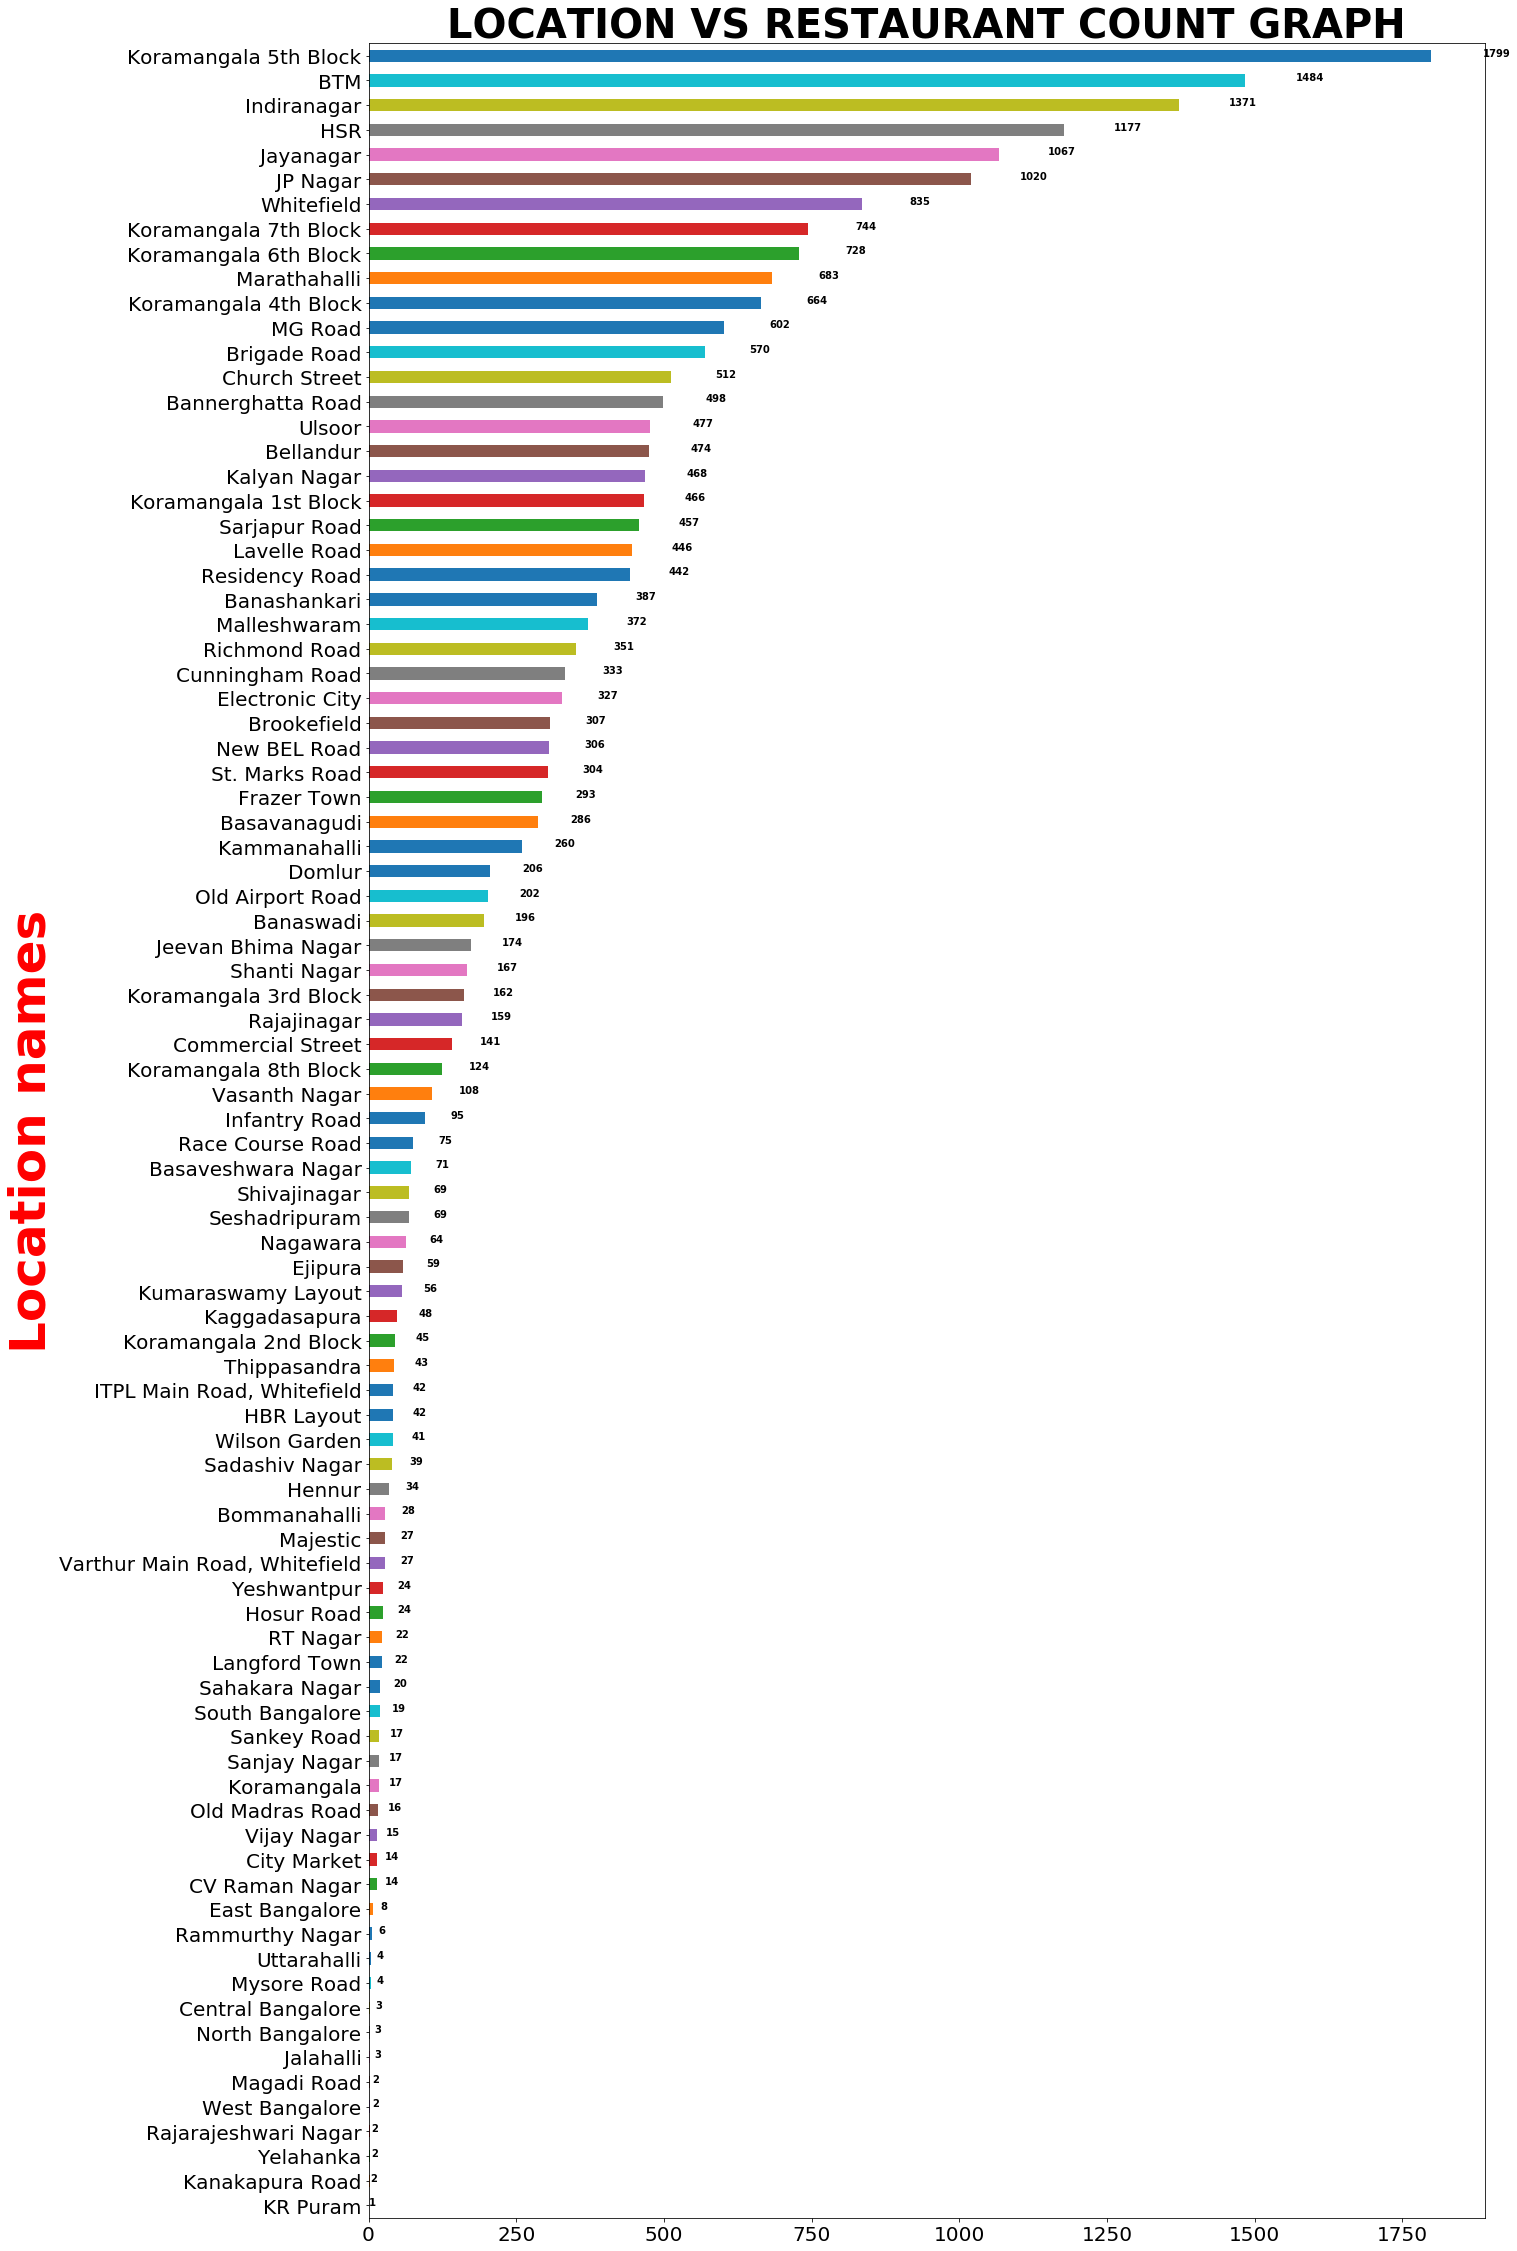

In [86]:
locationCount=data['location'].value_counts().sort_values(ascending=True)
fig=plt.figure(figsize=(20,40))
locationCount.plot(kind="barh",fontsize=20)
plt.ylabel("Location names",fontsize=50,color="red",fontweight='bold')
plt.title("LOCATION VS RESTAURANT COUNT GRAPH",fontsize=40,color="BLACK",fontweight='bold')
for v in range(len(locationCount)):
    #plt.text(x axis location ,y axis location ,text value ,other parameters......)
    plt.text(v+locationCount[v],v,locationCount[v],fontsize=10,color="BLACK",fontweight='bold')